# Duboko Učenje: 2. Laboratorijska vježba

### Upute za za zadaću su dostupne [ovdje](http://www.zemris.fer.hr/~ssegvic/du/lab0.shtml)

In [174]:
import data
import binlogreg
import logreg
import mlutils

import matplotlib.pyplot as plt
import numpy as np

from importlib import reload
reload(data)
reload(binlogreg)
reload(logreg)

<module 'logreg' from '/home/lumba/Programming/Python/deep-learning/dl-lab0/logreg.py'>

## 1. Stvaranje umjetnog skupa 2D podataka

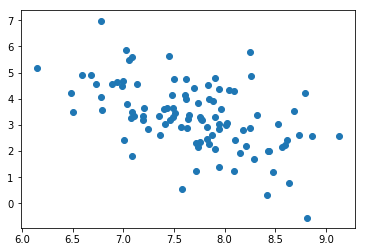

In [138]:
G = data.Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

## 2. Učenje binarne logističke regresije gradijentnim spustom

### 2.1 Neregularizirana logistička regresija

In [139]:
np.random.seed(100)

X,Y_ = data.sample_gauss_2d(2, 100)

# train the model
w,b = binlogreg.train(X, Y_)

# evaluate the model on the training dataset
probs = binlogreg.classify(X, w,b)
Y = np.array([1 if y >= 0.5 else 0 for y in probs])

# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

0.965 0.9894736842105263 0.94 0.9971040469419724


### 2.2 Regularizirana logistička regresija

In [140]:
w_reg,b_reg = binlogreg.train(X, Y_, alpha=10)

# evaluate the model on the training dataset
probs_reg = binlogreg.classify(X, w_reg,b_reg)
Y_reg = np.array([1 if y >= 0.5 else 0 for y in probs_reg])

# report performance
accuracy, recall, precision = data.eval_perf_binary(Y_reg, Y_)
AP = data.eval_AP(Y_[probs_reg.argsort()])
print (accuracy, recall, precision, AP)

0.96 0.9893617021276596 0.93 0.9967201729986034


## 3. Grafički prikaz rezultata klasifikacije 

In [141]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

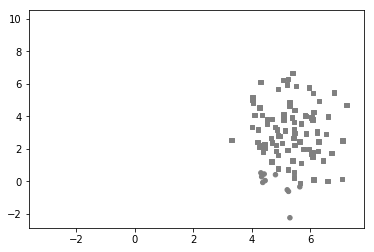

In [142]:
np.random.seed(100)
  
# get the training dataset
X,Y_ = data.sample_gauss_2d(2, 100)

# get the class predictions
Y = myDummyDecision(X)>0.5

# graph the data points
data.graph_data(X, Y_, Y) 

# show the results
plt.show()

## 4. Iscrtavanje funkcije odluke

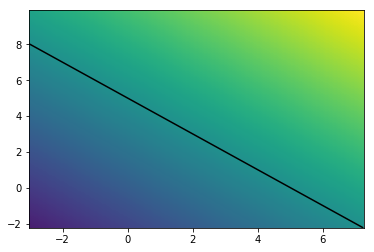

In [143]:
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, bbox, offset=0)

## 5. Grafički prikaz binarne logističke regresije

In [144]:
def binlogreg_decfun(w,b):
    return lambda X: binlogreg.classify(X, w, b)

accuracy: 0.96500, recall: 0.98947, precision: 0.94000, AP: 0.99710


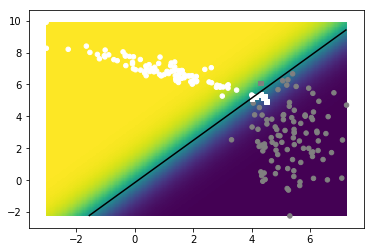

In [145]:
# instantiate the dataset
np.random.seed(100)

X,Y_ = data.sample_gauss_2d(2, 100)

# train the logistic regression model
w,b = binlogreg.train(X, Y_)

# evaluate the model on the train set
probs = binlogreg.classify(X, w,b)

# recover the predicted classes Y
Y = np.array([1 if y >= 0.5 else 0 for y in probs])

# evaluate and print performance measures
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print ("accuracy: %.5f, recall: %.5f, precision: %.5f, AP: %.5f"
       %(accuracy, recall, precision, AP))

# graph the decision surface
decfun = binlogreg_decfun(w,b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

## 6. Višerazredna logistička regresija

In [176]:
def logreg_decfun(X, W, b):
    def classify(X):
        return logreg.classify(X, W, b).argmax(axis=1)
    return classify

accuracy: 0.87000, 

precision-recall matrix: 
[(0.64, 0.9552238805970149), (0.97, 0.9797979797979798), (1.0, 0.746268656716418)], 

confusion matrix: 
[[ 64   2  34]
 [  3  97   0]
 [  0   0 100]]


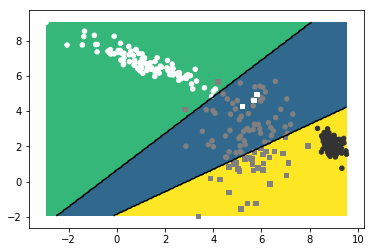

In [182]:
# instantiate the dataset
np.random.seed(100)

X,Y_ = data.sample_gauss_2d(3, 100)

# train the logistic regression model
W,b = logreg.train(X, Y_)

# evaluate the model on the train set
probs = logreg.classify(X, W,b)

Y = logreg.predict(probs)

# evaluate and print performance measures
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_)
print("accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

# graph the decision surface
decfun = logreg_decfun(X, W, b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))

data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show()